# Machine Learning - Unsupervised Learning and Feature Engineering
## Unit 5. Feature Selection
### Lecturer: Tai Le Quy
#### 30.8.2023
Thanks Prof. Dr. Christian Müller-Kett for his code.

## 1 Feature Importance

### 1.1 ANOVA test

In [1]:
# Feature Importance
# ANOVA test

#SelectKBest is a function that takes two arrays as input: the data points X and target 
#or response variable or column y, and
#returns a pair of arrays (features scores and p-values) or just the features’ scores array.
#It return f_classif is a function that performs ANOVA test by assigning it a p-value for
#a classification task. Then, SelectKBest will rank the different features according to their
#assigned p-value (the lower the better) and will retain the best k features. Hence, k
#must be predefined by the user.

#%% import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest   
from sklearn.feature_selection import f_classif

In [2]:
#%% load sample data
iris = load_iris()
feature_names = load_iris().feature_names
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [4]:
#%%
# create feature selector which uses F-values
# in an ANOVA-test between test samples and labels
# to select 2 features
selector = SelectKBest(score_func=f_classif, k=2)

In [5]:
#%% fit the selector
X_new = selector.fit_transform(X, y)

In [6]:
X_new

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [7]:
#%% print F- and p-values per feature
pd.DataFrame({'features': feature_names, 
    'Scores': selector.scores_, 
    'p-values': selector.pvalues_})

,features,Scores,p-values
0,sepal length (cm),119.264502,1.669669e-31
1,sepal width (cm),49.160040,4.492017e-17
2,petal length (cm),1180.161182,2.856777e-91
3,petal width (cm),960.007147,4.169446e-85


### 1.2 Chi-square test

In [14]:
#%% import libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

In [15]:
#Load the data
#This dataset is used to predict the bank churn rate: left a bank or decided to stay
#https://www.kaggle.com/datasets/sonalidasgupta95/churn-prediction-of-bank-customers?resource=download
churn_df = pd.read_csv('Churn_Modelling.csv')

In [16]:
#%% prepare the data
y = churn_df['Exited']
X = churn_df[['Gender', 'HasCrCard', 'IsActiveMember']]

In [17]:
X

,Gender,HasCrCard,IsActiveMember
0,Female,1,1
1,Female,0,1
2,Female,1,0
3,Female,0,0
4,Female,1,1
...,...,...,...
9995,Male,1,0
9996,Male,1,1
9997,Female,0,1
9998,Male,1,0


In [18]:
#%% apply label encoder
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
X

,Gender,HasCrCard,IsActiveMember
0,0,1,1
1,0,0,1
2,0,1,0
3,0,0,0
4,0,1,1
...,...,...,...
9995,1,1,0
9996,1,1,1
9997,0,0,1
9998,1,1,0


In [20]:
#%% create and fit feature selector
selector = SelectKBest(chi2, k=2)
selector.fit(X,y)

SelectKBest(k=2, score_func=<function chi2 at 0x0000027715F4B8B8>)

In [21]:
#%% apply feature selector to the data
X_new = selector.transform(X)

In [22]:
X_new

array([[0, 1],
       [0, 1],
       [0, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 0]], dtype=int64)

In [23]:
#%% print Chi²-statistics- and p-values per feature
pd.DataFrame({'features': X.columns.values, 'Scores': selector.scores_, 'p-values': selector.pvalues_})


,features,Scores,p-values
0,Gender,51.539926,7.015575e-13
1,HasCrCard,0.150041,6.984962e-01
2,IsActiveMember,118.199414,1.568036e-27


### 1.3 Mutual information

In [24]:
#%% import libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pandas as pd
from sklearn.datasets import load_iris

In [25]:
#%% load sample data
iris = load_iris()
feature_names = load_iris().feature_names
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [26]:
##%% create and fit feature selector
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_new = selector.fit_transform(X, y)

In [27]:
#%% print mutual information per feature
pd.DataFrame({'features': X.columns.values, 'Scores': selector.scores_})

,features,Scores
0,sepal length (cm),0.488584
1,sepal width (cm),0.229371
2,petal length (cm),0.983380
3,petal width (cm),0.995523


### 1.4 Permutation Feature Importance

In [23]:
#%% load libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#%% load sample data
iris = load_iris()

In [25]:
#%% split the data into training and testing, 0.25 test size default
X_train, X_test, y_train,y_test = train_test_split(iris.data, iris.target)

In [26]:
#%% create and fit a KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
#%% assess feature importance by permutation 
feat_imp = permutation_importance(model, X_test, y_test, n_repeats=10, scoring='accuracy')

In [28]:
#%% display calculated feature importances
#The scores in the table above show how much model performance and accuracy rate
#decreased with a random permutation. Therefore, the most important features are
#first “petal length,” then “petal width.” The other two features have very little importance
#since their impact on the accuracy rate is very small. 

pd.DataFrame({'features': iris.feature_names, 
 'importances_mean': feat_imp['importances_mean'], 
 'importances_std': feat_imp['importances_std']})

,features,importances_mean,importances_std
0,sepal length (cm),-0.002632,0.018421
1,sepal width (cm),0.013158,0.024262
2,petal length (cm),0.565789,0.065789
3,petal width (cm),0.107895,0.039823


## 2 Feature Variance

#### Example 1

In [28]:
#%% load libraries
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [29]:
#%% generate sample data
X = np.array([[0, 2, 0, 3], [0, 3, 4, 3], 
    [0, 5, 1, 2]])

In [30]:
#%% apply variance threshold
selector = VarianceThreshold(threshold=0.4)
Xs = selector.fit_transform(X)

In [31]:
#%% show the variances per feature
# (the ones above the threshold were chosen)
print(selector.variances_)

[0.         1.55555556 2.88888889 0.22222222]


#### Example 2

In [32]:
#%% load sample data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [33]:
#%% create and fit feature selector
selector = VarianceThreshold(threshold=0.6)
selector.fit_transform(X)

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [34]:
#%%
# show the variances per feature
# (the ones above the threshold were chosen)
pd.DataFrame({'features': iris.feature_names, 
    'variances': selector.variances_})

,features,variances
0,sepal length (cm),0.681122
1,sepal width (cm),0.188713
2,petal length (cm),3.095503
3,petal width (cm),0.577133


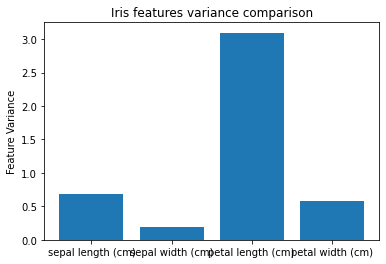

In [38]:
#%% create a barplot visual based on the variances
plt.bar(x=iris.feature_names, height=selector.variances_)
plt.ylabel('Feature Variance')
plt.title('Iris features variance comparison')
plt.show()

In [39]:
#%% Select features with variance greater than 0.6 and display the names of selected features. 
#The method get_support()
for selected_feature in selector.get_support(indices=True):
    print('* ' + feature_names[selected_feature])

* sepal length (cm)
* petal length (cm)


## 3 Correlation matrix

### 3.1 Pearson’s Correlation

In [35]:
#%% load libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [36]:
#%% load sample data
iris = load_iris()
X = pd.DataFrame(iris.data, 
    columns=iris.feature_names)
y = pd.DataFrame(iris.target, 
    columns=['Response_variable'])
XY = pd.concat([X, y], axis=1)

In [37]:
#%% calcualte the correlation matrix
cor_mat = XY.corr(method='pearson')
cor_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Response_variable
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Response_variable,0.782561,-0.426658,0.949035,0.956547,1.000000


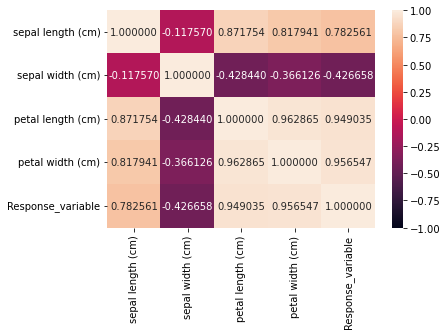

In [43]:
#%% correlation matrix as heatmap
ax = sns.heatmap(cor_mat, vmin=-1, vmax=1, 
    annot=True, fmt="f")
plt.show()

### 3.2 Spearman correlation

In [38]:
#%% generate sampe data
dat = pd.DataFrame({'x': np.arange(0,10), 
    'y': np.exp(-np.arange(0,10))})

In [39]:
#%%
# compute Pearson’s correlation and
# display the correlation matrix
dat.corr(method='pearson')

,x,y
x,1.00000,-0.71687
y,-0.71687,1.00000


In [40]:
#%% test for normal distribution of the data
stats.normaltest(dat['x'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=2.02697581498966, pvalue=0.362950830342156)

In [41]:
stats.normaltest(dat['y'])

NormaltestResult(statistic=19.779358749097575, pvalue=5.0695197559354735e-05)

In [42]:
#%%
# compute Spearman’s rank correlation and
# display the correlation matrix
dat.corr(method='spearman')

,x,y
x,1.0,-1.0
y,-1.0,1.0


## 4 Recursive Feature Selection

### 4.1 Exclusive Feature Selection (EFS)

In [43]:
# Recursive feature selection
# Exclusive Feature Selection (EFS)

#%% import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from mlxtend.feature_selection \
    import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [44]:
#%% load sample data
iris = load_iris()
x = pd.DataFrame(iris.data, 
    columns=iris.feature_names)

In [45]:
#%% create a logistic regression object
lr = LogisticRegression()

In [46]:
#%% create an EFS object, cross-validations = 5
efs = EFS(estimator=lr,        
          min_features=1,      
          max_features=3,      
          scoring='accuracy',  
          cv=5)

In [47]:
#%% fit the model
efs = efs.fit(x, iris.target)

Features: 14/14

In [48]:
#%% show the selected features
efs.best_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [49]:
#%% show a full report on the feature selection
efs_results = pd.DataFrame(efs.get_metric_dict()).T.sort_values(by='avg_score', ascending=False)

In [50]:
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal width (cm), petal length (cm), petal wi...",0.027096,0.021082,0.010541
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997


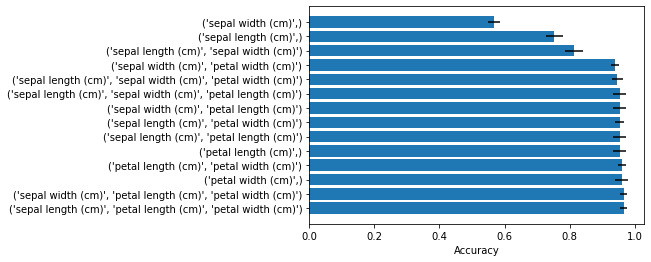

In [51]:
#%% show feature importance visually
# create figure and axes
fig, ax = plt.subplots()
# plot bars
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, efs_results['avg_score'], 
    xerr=efs_results['std_err'])
# set axis ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')

# show the plot
plt.show()

### 4.2 Sequential Forward Feature Selection (SFS)

In [69]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [67]:
# load sample data
iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)

In [70]:
# Create a logistic regression model
lr = LogisticRegression()

In [71]:
#%% create an SFS object
sfs = SFS(estimator=lr,
          k_features=(1, 3),  
          forward=True,       
          scoring='accuracy', 
          cv=5)   

In [72]:
#%% fit the model
sfs = sfs.fit(x, iris.target)

In [73]:
#%% show the selected features
sfs.k_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [74]:
#%% show a full report on the feature selection
sfs_results = pd.DataFrame(sfs.get_metric_dict()).T.sort_values(by='avg_score', ascending=False)

In [75]:
sfs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472


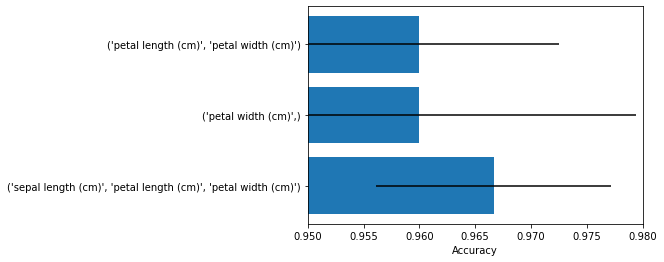

In [76]:
#%% show feature importance visually
# create figure and axes
fig, ax = plt.subplots()

# plot bars
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, sfs_results['avg_score'], \
    xerr=sfs_results['std_err'])

# set axis ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')

# limit range to overimpose differences
plt.xlim([0.95, 0.98])

# show the plot
plt.show()

### 4.3 Sequential Backward Feature Selection (SBS)

In [78]:
# Sequential Backward Feature Selection (SBS)

#%% import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from mlxtend.feature_selection     import SequentialFeatureSelector as SBS
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [79]:
#%% load sample data
iris = load_iris()
x = pd.DataFrame(iris.data, 
    columns=iris.feature_names)

In [80]:
#%% create a logistic regression object
lr = LogisticRegression()

In [81]:
#%% create an SBS object
sbs = SBS(estimator=lr,
          k_features=(1, 3),  
          forward=False,       
          scoring='accuracy', 
          cv=5)    

In [82]:
#%% fit the model
sbs = sbs.fit(x, iris.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [83]:
#%% show the selected features
sbs.k_feature_names_

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [84]:
#%% show a full report on the feature selection
sbs_results = pd.DataFrame(sbs.get_metric_dict()).T.sort_values(by='avg_score', ascending=False)

In [85]:
sbs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal length (cm), sepal width (cm), petal le...",0.032061,0.024944,0.012472
3,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal length (cm), petal length (cm), petal w...",0.027096,0.021082,0.010541
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal length (cm), petal width (cm))",0.032061,0.024944,0.012472
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal width (cm),)",0.049963,0.038873,0.019437


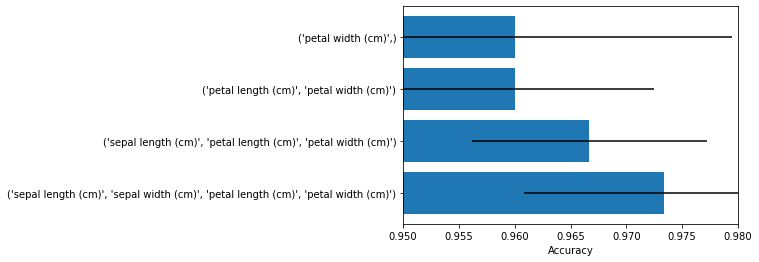

In [86]:
#%% show feature importance visually
# create figure and axes
fig, ax = plt.subplots()
# plot bars
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos, sbs_results['avg_score'], \
    xerr=sbs_results['std_err'])

# set axis ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')

# limit range to overimpose differences
plt.xlim([0.95, 0.98])

# show the plot
plt.show()

### 4.4 Recursive Feature Elimination (RFE)

In [96]:
# Recursive Feature Elimination

#%% import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [97]:
#%% load sample data
iris = load_iris()
x = pd.DataFrame(iris.data,columns=iris.feature_names)

In [98]:
#%% create a logistic regression object
lr = LogisticRegression()

In [102]:
#%% create and fit logistic regressor with RFE
rfe = RFE(estimator = lr, n_features_to_select =3)
rfe.fit(x, iris.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [103]:
#%% show which feature were selected
pd.DataFrame({'features': iris.feature_names,
    'Selected features': rfe.support_, 
    'Feature ranks': rfe.ranking_})

,features,Selected features,Feature ranks
0,sepal length (cm),False,2
1,sepal width (cm),True,1
2,petal length (cm),True,1
3,petal width (cm),True,1


In [106]:
#Other option: It is possible to find the number of features to be selected using cross validation
#%% REF with cross-validation = 5
#step: the number of features to be eliminated at each iteration
rfecv = RFECV(estimator=lr, step=1, cv=5, 
    scoring='accuracy', 
    min_features_to_select= 3).fit(x, iris.target)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [107]:
#%% show grid scores for selected featues
print(rfecv.grid_scores_)

[[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
 [0.96666667 1.         0.93333333 0.96666667 1.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [108]:
rfecv.cv_results_

{'mean_test_score': array([0.96666667, 0.97333333]),
 'std_test_score': array([0.02108185, 0.02494438]),
 'split0_test_score': array([0.96666667, 0.96666667]),
 'split1_test_score': array([0.96666667, 1.        ]),
 'split2_test_score': array([0.93333333, 0.93333333]),
 'split3_test_score': array([0.96666667, 0.96666667]),
 'split4_test_score': array([1., 1.])}

In [109]:
# The number of selected features with cross-validation.
rfecv.n_features_

4